In [2]:
from pathlib import Path
import numpy as np
import matplotlib
from scipy import signal

%matplotlib inline

import matplotlib.pyplot as plt

In [3]:
start = 149548966594
end = 149548968421

root = Path("data/0524")
timestamps = [p.stem for p in root.glob("*.jpg") if int(p.stem) >= start and int(p.stem) <= end]

In [4]:
import csv

def read_piece(path, piece_no):
    result = []
    with open(path) as f:
        reader = csv.reader(f)
        for row in reader:
            if int(row[0]) == piece_no:
                result.append(list(map(float, row[2:])))
    total = np.array(result)
    return total[:, :12], total[:, 12:24], total [:, 24:]

print(read_piece('processed.csv', 1))

(array([[ 0.1541822 ,  0.17307852, -0.25190747, ..., -0.34062546,
        -0.8727845 ,  0.34960181],
       [-0.35224563,  0.24555552, -0.07028544, ..., -0.30886602,
        -0.86232662,  0.40124145],
       [-0.1113833 , -0.1327772 ,  0.2513102 , ..., -0.27279457,
        -0.86340863,  0.4243921 ],
       ..., 
       [-0.08618921,  0.35523981,  1.08637285, ..., -0.48896217,
        -0.71841425,  0.49476954],
       [-0.74632776,  0.86799681, -0.66022056, ..., -0.48784196,
        -0.71372646,  0.50259805],
       [ 0.27837932,  0.0123739 , -0.09359818, ..., -0.45797545,
        -0.72739947,  0.51102698]]), array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.50642782,  0.072477  ,  0.18162203, ...,  0.03175944,
         0.01045787,  0.05163965],
       [-0.26556549, -0.30585572,  0.50321767, ...,  0.06783089,
         0.00937587,  0.0747903 ],
       ..., 
       [-0.24037141,  0.18216129,  1.33828032, ..., -0.14833671,
      

4 4


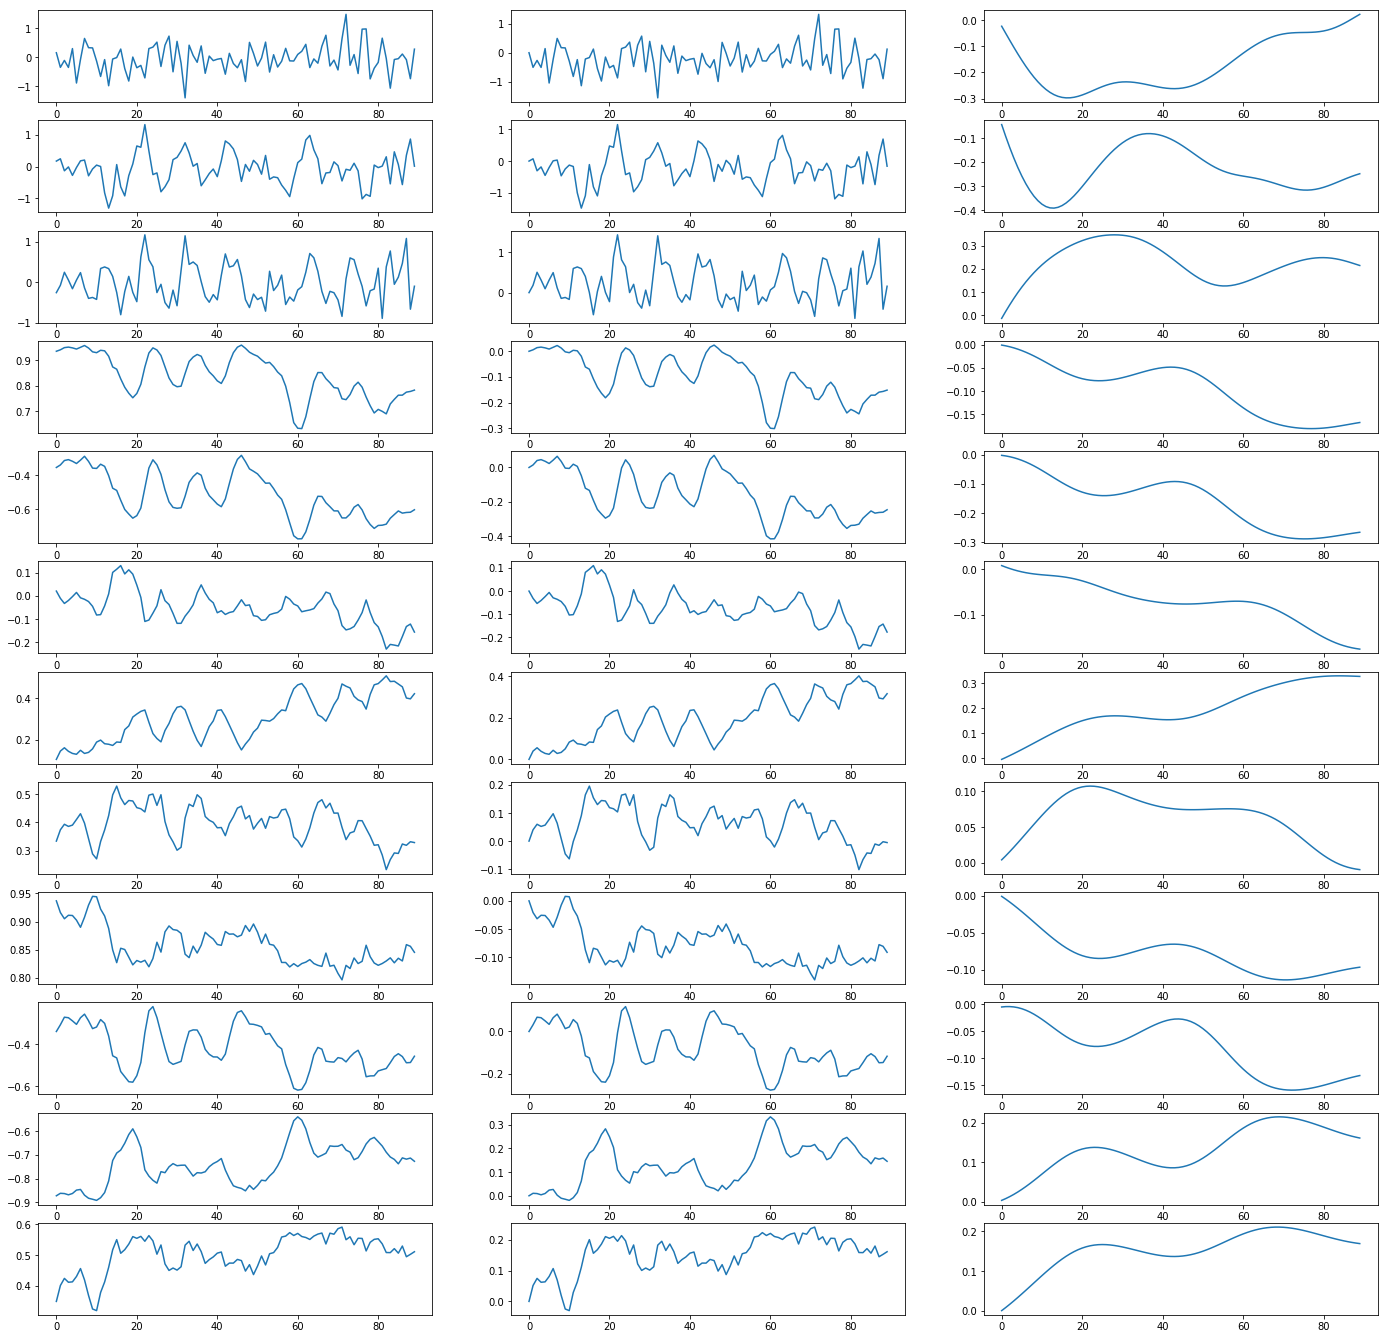

In [15]:
fig, axes = plt.subplots(12, 3, figsize=(24, 24))
b,a = signal.butter(3,0.01,'low')  
print(len(b), len(a))
for j, metrics in enumerate(read_piece('processed.csv', 1)):
    for i in range(12):
        axes[i][j].plot(np.arange(metrics.shape[0]), metrics[:, i])